# Import Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 : Loading the Dataset(Titanic)

In [50]:
gender_df=pd.read_csv("gender_submission.csv")
test_df=pd.read_csv("test.csv")
train_df=pd.read_csv("train.csv")

In [51]:
gender_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [52]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [53]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [54]:
# merge 3 csv files before going to EDA

file1=pd.read_csv('gender_submission.csv')
file2=pd.read_csv('test.csv')
#file3=pd.read_csv('train.csv')
file3=pd.merge(file1,file2,on='PassengerId',how='inner')
file3.to_csv('train.csv',index=False)
file3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
# printing the no of columns in file3

file3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Step 2 : Data Profilling and Cleaning

In [56]:
file3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [57]:
print("\nColumns with missing value\n") 
print(file3.isnull().any())


Columns with missing value

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


# Handling Null Values

In [58]:
# There are a few columns that contain null values,to get the total no of null value columns we use isnull()+sum()+sum() method

file3.isnull().sum().sum()

414

In [59]:
# count the no of null values in each column,to get this by using isnull()+sum() method

file3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [60]:
# in file3 cabin,age and fare column contains null values so first we fill values in that columns.
# fill the cabin column with 'c' values

def fill_na_cabin(file3,Cabin):
    
    return file3[Cabin].fillna('C')
    
file3['Cabin'] = fill_na_cabin(file3,'Cabin')

In [61]:
file3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,C,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,C,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,C,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,C,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,C,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,C,S


In [62]:
# and then fill the age column with mean values

mean = file3['Age'].mean()
sd = file3['Age'].std()
print(mean,sd)

30.272590361445783 14.18120923562442


In [63]:
# The mean of the dataset is 14.18 and the standard deviation of the dataset is 30.27. 
# Hence we fill the missing values by choosing a random number between 15 and 31.

def fill_na_age(file3,Age):
    mean = file3['Age'].mean()
    sd = file3['Age'].std()
    def fill_empty(x):
        if np.isnan(x):
            return np.random.randint(mean-sd, mean+sd, ())
        return x
    return file3[Age].apply(fill_empty).astype(int)
file3['Age'] = fill_na_age(file3, 'Age')

In [64]:
file3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,C,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,C,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,C,Q
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,C,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,C,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27,0,0,A.5. 3236,8.0500,C,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,C,S
416,1308,0,3,"Ware, Mr. Frederick",male,25,0,0,359309,8.0500,C,S


In [65]:
# fill fare column with 'f' values

def fill_na_fare(file3,Fare):
    
    return file3[Fare].fillna('f')
    
file3['Fare'] = fill_na_cabin(file3,'Fare')

In [66]:
file3.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

# Step 3 : EDA and Visualization

In [67]:
# seperate some of the data into numeric and categorical

df_num = file3[['Age','SibSp','Parch']]
df_cat = file3[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

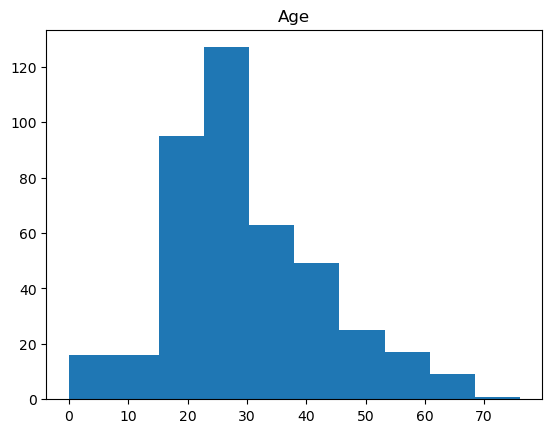

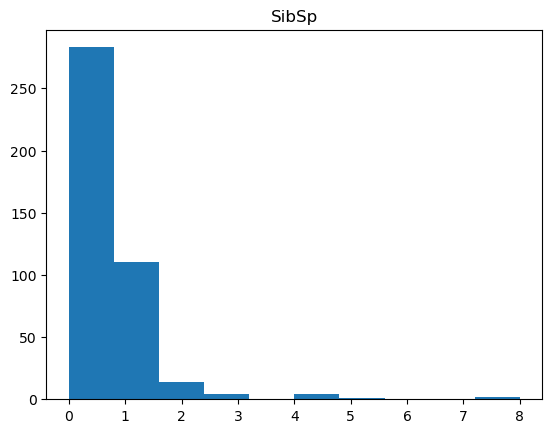

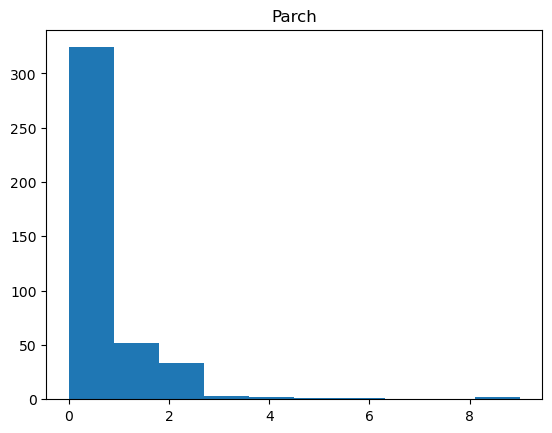

In [68]:
# plot numeric data(Histogrm)

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

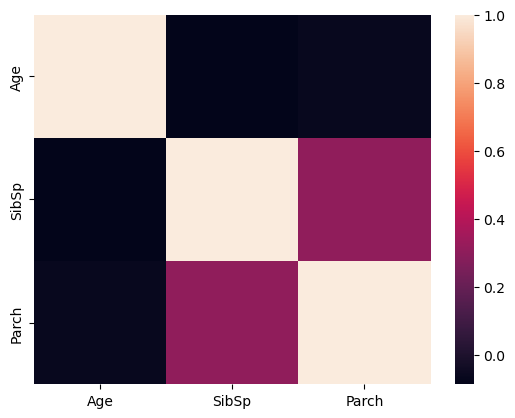

In [69]:
# plot a correlation heatmap between the numeric columns
# (heatmap)

sns.heatmap(df_num.corr())
 

In [70]:
# compare survival rates across the numeric variables. 

pd.pivot_table(file3, index = 'Survived', values = ['Age','SibSp','Parch'])

,Age,Parch,SibSp
Survived,,,
0,29.766917,0.274436,0.379699
1,29.769737,0.598684,0.565789


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


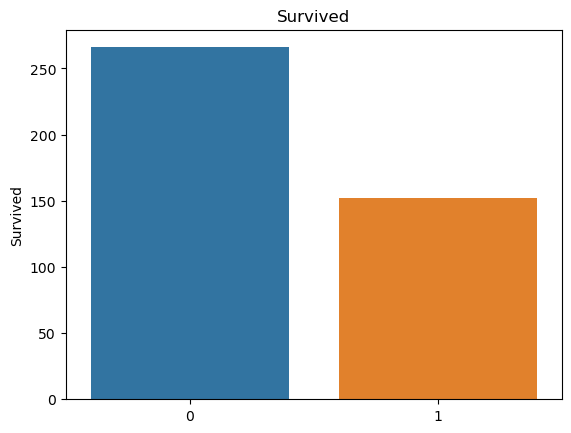

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


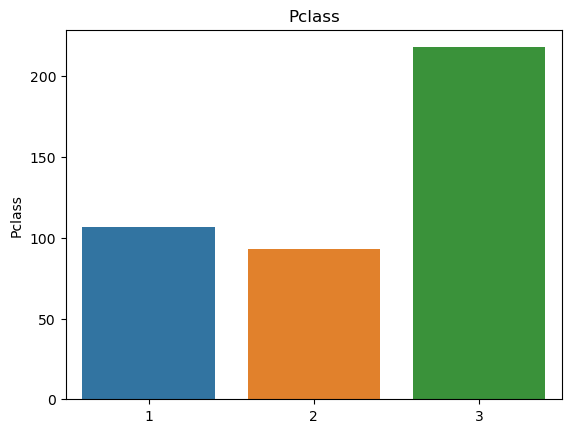

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


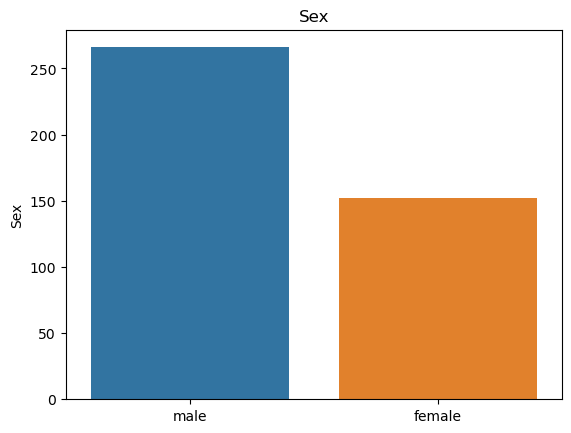

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


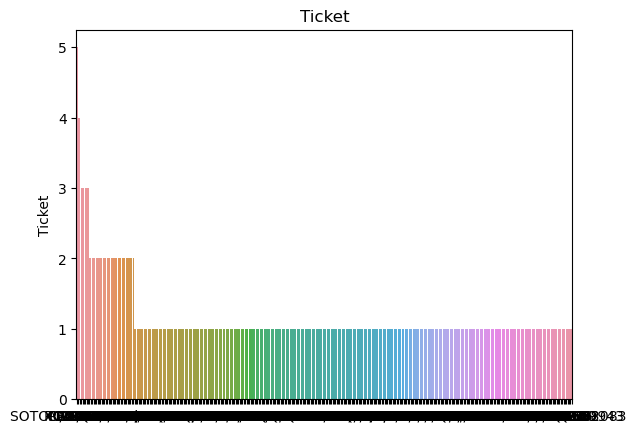

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


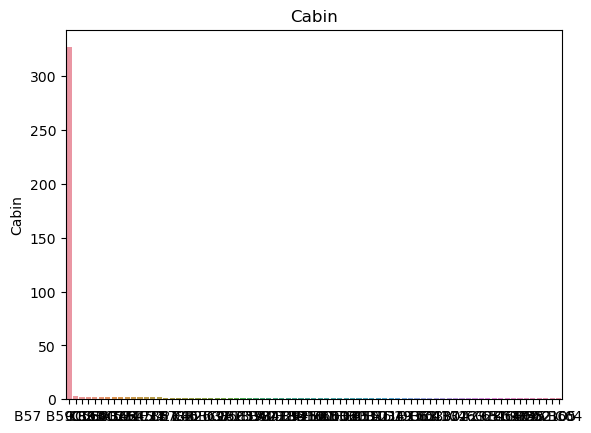

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


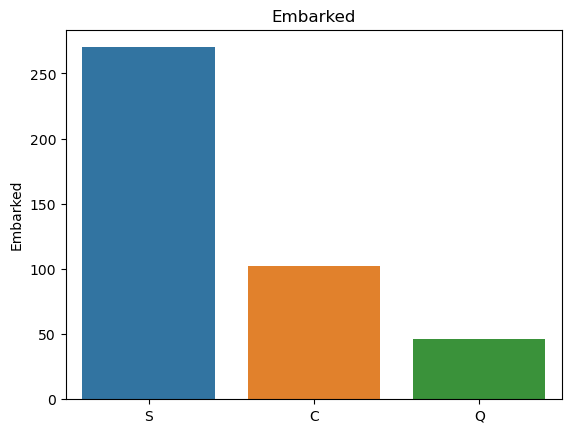

In [71]:
# plot categorical data(histogram)

for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [72]:
# In categorical variables, compare the dependent and independent variable, which is if people survived

print(pd.pivot_table(file3, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(file3, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(file3, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass     1   2    3
Survived             
0         57  63  146
1         50  30   72

Sex       female   male
Survived               
0            NaN  266.0
1          152.0    NaN

Embarked   C   Q    S
Survived             
0         62  22  182
1         40  24   88


In [73]:
# compare the correlation between catrgorical variables pclass and survived using barchart

mean_titanic = file3[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [74]:
mean_titanic

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


<AxesSubplot:ylabel='Survived'>

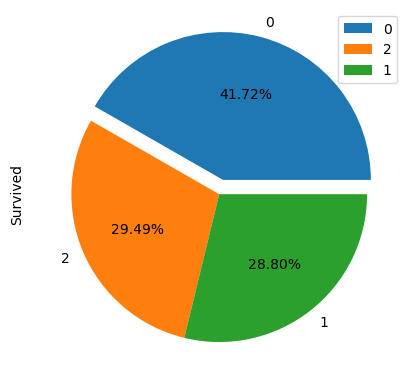

In [75]:
mean_titanic.plot(kind='pie', x='Pclass', y='Survived', autopct='%.2f%%', explode=[0.1,0,0])

In [76]:
# relation between diffrent variables

file3[["Sex", "PassengerId"]].groupby(['Sex']).count().sort_values(by='PassengerId', ascending=False)

,PassengerId
Sex,
male,266
female,152


In [77]:
file3[["Sex", "Survived"]].groupby(['Survived'], as_index=False).count().sort_values(by='Survived', ascending=False)

,Survived,Sex
1,1,152
0,0,266


In [78]:
file3[["Survived","Sex"]].groupby(['Survived'], as_index=False).count().sort_values(by='Survived', ascending=False)

,Survived,Sex
1,1,152
0,0,266


In [79]:
file3[["Survived","Sex"]].groupby(['Sex']).count()

,Survived
Sex,
female,152
male,266


<AxesSubplot:xlabel='Pclass'>

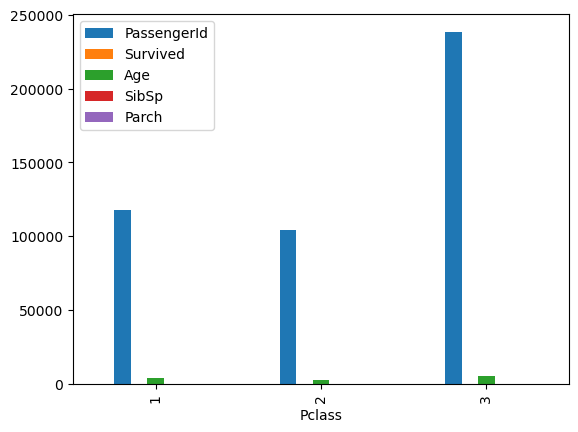

In [80]:
file3.groupby('Pclass').sum().plot.bar()

<AxesSubplot:xlabel='Sex', ylabel='count'>

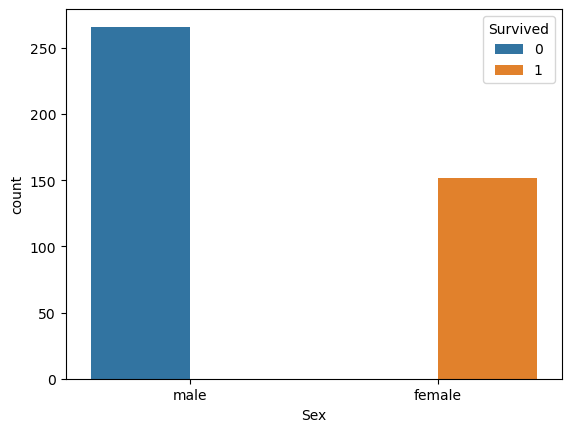

In [82]:
sns.countplot(data=file3,x='Sex',hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

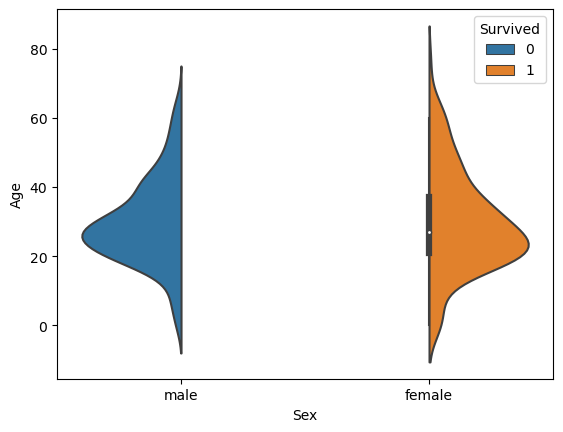

In [83]:
# Violinplot Displays distribution of data across all levels of a category.

sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = file3, split = True)

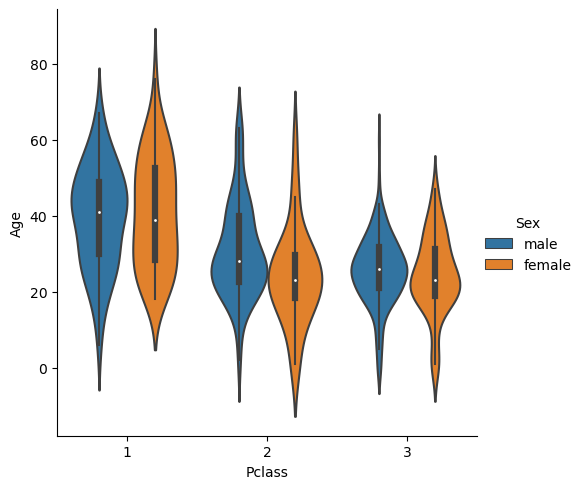

In [98]:
sns.catplot(x='Pclass', y='Age', data=file3, kind='violin', hue='Sex')

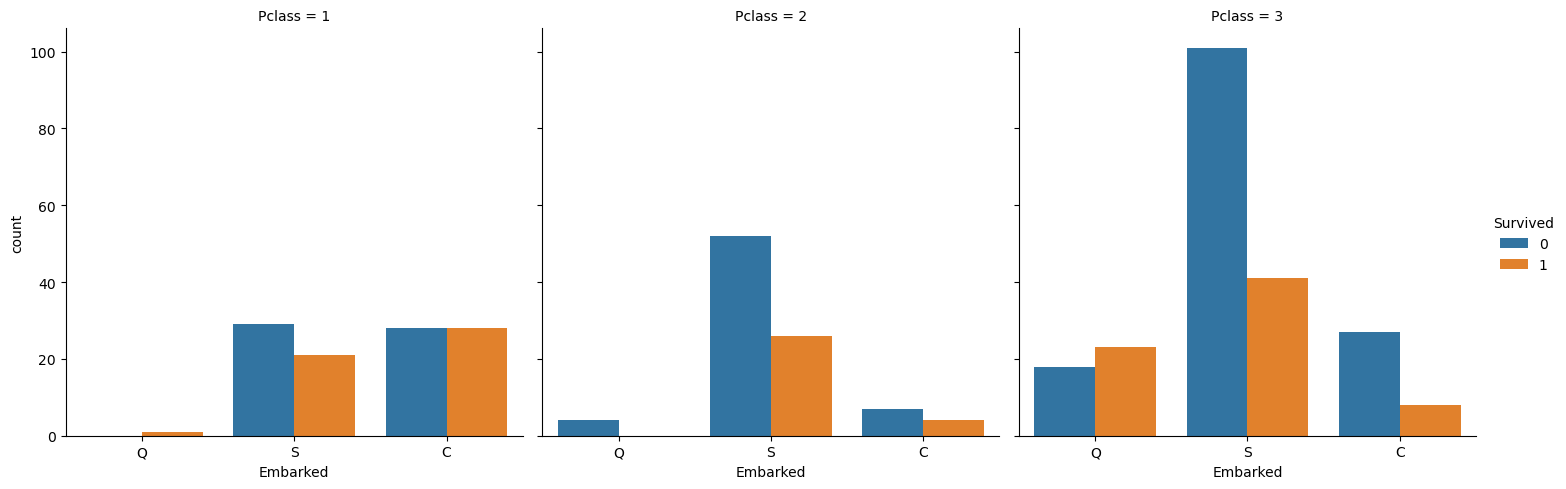

In [84]:
# Countplot

sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = file3)

In [91]:
# Univariate Analysis

file3['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


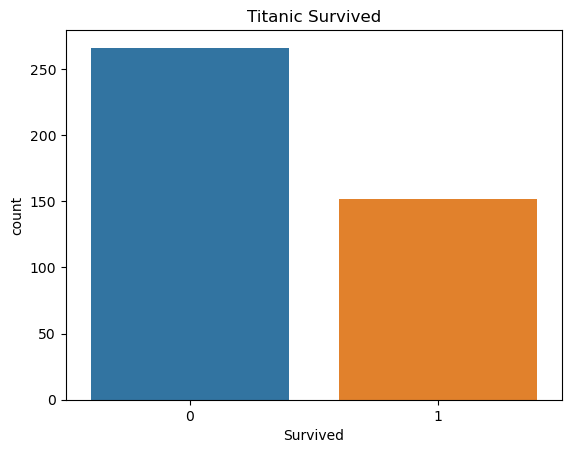

In [92]:
# From the above result, 418 out of 152 passengers in the training data are survived. Let's plot it using count plot.

sns.countplot('Survived', data=file3)
plt.title("Titanic Survived")
plt.show()


In [93]:
# Bivariate Analysis
# analyze the ‘Pclass’ column since it is highly correlated with the target variable.

file3['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [94]:
file3.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            57
        1            50
2       0            63
        1            30
3       0           146
        1            72
Name: Survived, dtype: int64

The above result shows the breakup of passengers based on Pclass and Survived. But still, we cannot see the percentage of survival with this data. So let's plot Pclass along with the Survived to have a better picture of the data.

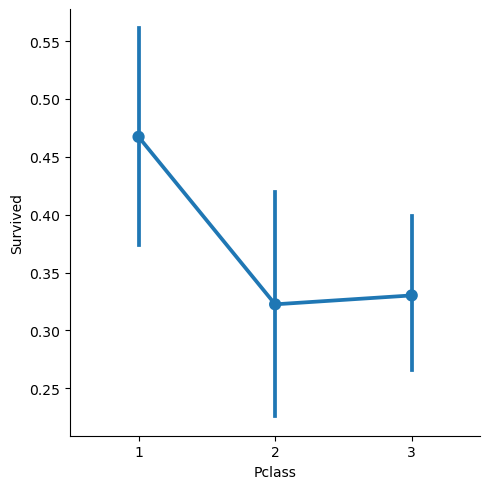

In [95]:
sns.catplot(x='Pclass', y='Survived', data=file3, kind='point')

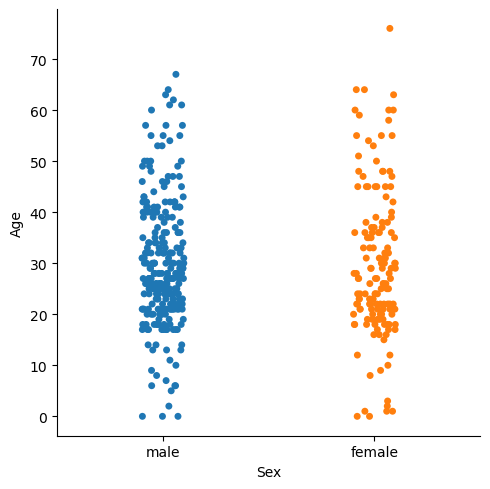

In [96]:
# Multivariate Analysis

sns.catplot(x='Sex', y='Age', data=file3)

# Inferences and Conclusion

The purpose of Titanic dataset is to use the existing features of passengers onboard Titanic as predictors to predict their survival outcome, for 0 being dead and 1 being survived from the tragic ship crash.It is certain through the practice of model improvement.
However,we can easily see that the Titanic survival outcome is highly depended on several predictors, such as sex, age and passenger class. In particular, female are more likely to survived than male while keeping other predictors conditions constant, older people are less likely to survived while keeping other predictors conditions constant and lastly.


# References

1. Titanic Dataset
2. Tutorials point(pandas,seaborn,matplotlib)
3. W3school(pandas,seaborn,matplotlib)
4. Google for EDA
5. Youtube for EDA